### IMPORT LIBRARY

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

Cell code di atas merupakan pernyataan impor beberapa library yang akan digunakan dalam jurnal. Cell code tersebut juga menjelaskan bahwa kita mengimpor library dan mempersingkat namanya untuk penggunaan lebih lanjut.

### LOAD & SHOW IMAGE

Cell code di bawah berfungsi untuk membaca empat gambar (`jokoa`, `jokob`, `jokoc`, `jokod`) dari file dan menampilkannya dalam sebuah grid 2x2 menggunakan `matplotlib`. Setiap gambar diberi judul sesuai dengan labelnya (A, B, C, D), dan `plt.tight_layout()` digunakan untuk memastikan tata letak gambar rapi sebelum ditampilkan dengan `plt.show()`.

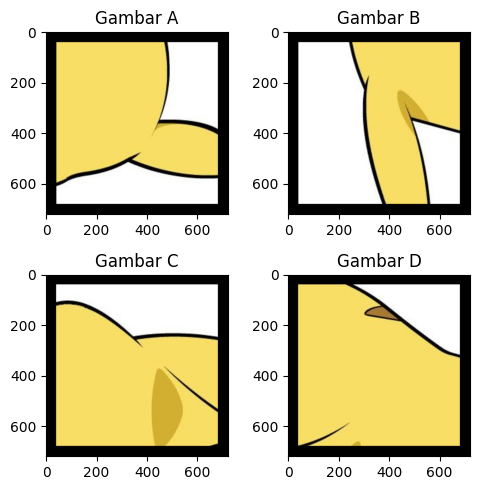

In [61]:
jokoa = plt.imread('Asset/JokoPikantoro_a.jpg')
jokob = plt.imread('Asset/JokoPikantoro_b.jpg')
jokoc = plt.imread('Asset/JokoPikantoro_c.jpg')
jokod = plt.imread('Asset/JokoPikantoro_d.jpg')

fig, axes = plt.subplots(2, 2, figsize=(5, 5))

axes[0, 0].imshow(jokoa)
axes[0, 0].set_title('Gambar A')

axes[0, 1].imshow(jokob)
axes[0, 1].set_title('Gambar B')

axes[1, 0].imshow(jokoc)
axes[1, 0].set_title('Gambar C')

axes[1, 1].imshow(jokod)
axes[1, 1].set_title('Gambar D')

plt.tight_layout()
plt.show()

### PROSES 1 : GRAYSCALE

Cell code di bawah berfungsi untuk mengonversi gambar `jokoa`, `jokob`, `jokoc`, dan `jokod` menjadi gambar grayscale menggunakan `cv2.cvtColor()`, dengan format warna diubah ke grayscale (`cv2.COLOR_BGR2GRAY`). Kemudian, gambar grayscale tersebut ditampilkan dalam grid 2x2 dengan menggunakan `matplotlib`, masing-masing gambar diberi label (A, B, C, D), dan `plt.tight_layout()` digunakan untuk merapikan tampilan sebelum ditampilkan.

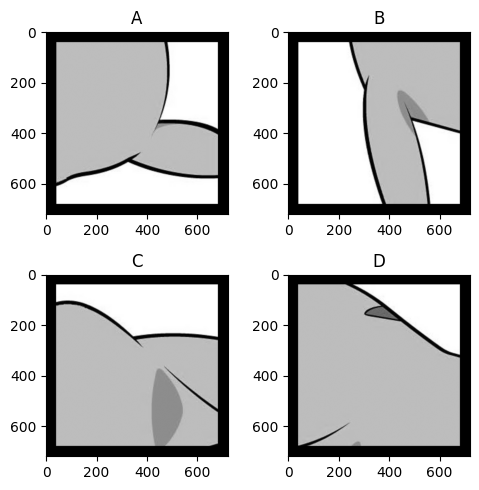

In [ ]:
jokoa_gray = cv2.cvtColor(jokoa, cv2.COLOR_BGR2GRAY)
jokob_gray = cv2.cvtColor(jokob, cv2.COLOR_BGR2GRAY)
jokoc_gray = cv2.cvtColor(jokoc, cv2.COLOR_BGR2GRAY)
jokod_gray = cv2.cvtColor(jokod, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(2, 2, figsize=(5, 5))
axes[0, 0].imshow(jokoa_gray, cmap='gray')
axes[0, 0].set_title('A')

axes[0, 1].imshow(jokob_gray, cmap='gray')
axes[0, 1].set_title('B')

axes[1, 0].imshow(jokoc_gray, cmap='gray')
axes[1, 0].set_title('C')

axes[1, 1].imshow(jokod_gray, cmap='gray')
axes[1, 1].set_title('D')

plt.tight_layout()
plt.show()

In [ ]:
Proses 1 diperlukan untuk membuat keempat gambar menjadi grayscale. Hal ini bertujuan untuk menyederhanakan informasi warna pada gambar dengan hanya mempertahankan intensitas cahaya (brightness) dari setiap piksel. Dengan mengubah gambar menjadi grayscale, pengolahan citra menjadi lebih efisien karena hanya memproses satu kanal warna dibandingkan tiga kanal (RGB). Selain itu, banyak algoritma pengolahan citra, seperti deteksi tepi, segmentasi, dan analisis fitur, bekerja lebih baik pada gambar grayscale karena fokus pada pola intensitas cahaya tanpa terganggu oleh informasi warna.

### PROSES 2 : MELAKUKAN FLIP & ROTATE

Cell code di bawah berfungsi untuk melakukan rotasi dan pembalikan (flip) pada gambar grayscale `jokoa_gray`, `jokob_gray`, `jokoc_gray`, dan `jokod_gray`. Gambar pertama diputar dengan rotasi -90° dan dibalik secara horizontal, gambar kedua diputar dengan rotasi -90° dan dibalik secara vertikal, gambar ketiga diputar dengan rotasi 90° dan dibalik secara horizontal, sedangkan gambar keempat dibalik secara vertikal sebelum diputar -90°. Kemudian, semua gambar yang telah diproses tersebut ditampilkan dalam grid 2x2 menggunakan `matplotlib` dengan colormap grayscale.

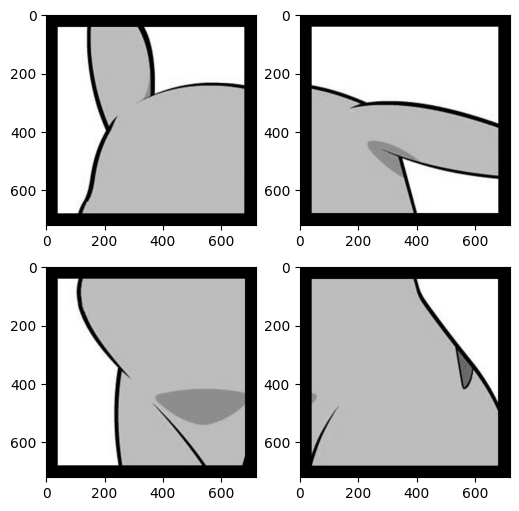

In [63]:
def flip(image, horizontal=False, vertical=False):

    if vertical:
        image = image[::-1]
    if horizontal:
        image = [row[::-1] for row in image]
    return image
def rotate_image(image, angle):
    tinggi = len(image)
    lebar = len(image[0])
    center_x = lebar / 2
    center_y = tinggi / 2

    rotated = [[0 for _ in range(lebar)] for _ in range(tinggi)]

    theta = math.radians(angle)

    for y in range(tinggi):
        for x in range(lebar):
            dx = x - center_x
            dy = y - center_y

            src_x = int(math.cos(-theta) * dx - math.sin(-theta) * dy + center_x)
            src_y = int(math.sin(-theta) * dx + math.cos(-theta) * dy + center_y)

            if 0 <= src_x < lebar and 0 <= src_y < tinggi:
                rotated[y][x] = image[src_y][src_x]

    return rotated

jokoa_rotate = rotate_image(jokoa_gray, -90)
jokoa_flip = flip(jokoa_rotate, horizontal=True, vertical=False)

jokob_rotate = rotate_image(jokob_gray, -90)
jokob_flip = flip(jokob_rotate, horizontal=False, vertical=True)

jokoc_rotate = rotate_image(jokoc_gray, 90)
jokoc_flip = flip(jokoc_rotate, horizontal=True, vertical=False)

jokod_hori = flip(jokod_gray, horizontal=False, vertical=True)
jokod_flip = rotate_image(jokod_hori, -90)


fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes[0, 0].imshow(jokoa_flip, cmap='gray')

axes[0, 1].imshow(jokob_flip, cmap='gray')

axes[1, 0].imshow(jokoc_flip, cmap='gray')

axes[1, 1].imshow(jokod_flip, cmap='gray')

plt.show()


Proses 2 diperlukan untuk melakukan flip dan rotate terhadap keempat gambar agar gambar berada dalam orientasi yang sesuai untuk proses penggabungan. Dengan memutar dan membalik gambar, kita dapat menyesuaikan posisi dan arah gambar sehingga lebih mudah untuk digabungkan secara visual maupun secara komputasi. Langkah ini penting untuk memastikan bahwa hasil akhir penggabungan gambar memiliki tata letak yang rapi dan sesuai dengan tujuan analisis atau presentasi.

### PROSES 3: TRANSLASI GAMBAR

Cell code di bawah berfungsi untuk menerapkan translasi (pergeseran) pada gambar-gambar yang sudah dibalik (flip). Fungsi `translate_image` digunakan untuk menggeser posisi piksel gambar dengan nilai `tx` (geser horizontal) dan `ty` (geser vertikal). Gambar `jokoa_flip`, `jokob_flip`, `jokoc_flip`, dan `jokod_flip` masing-masing digeser dengan nilai translasi yang berbeda. Setelah translasi diterapkan, gambar-gambar tersebut ditampilkan dalam grid 2x2 dengan colormap grayscale menggunakan `matplotlib`.

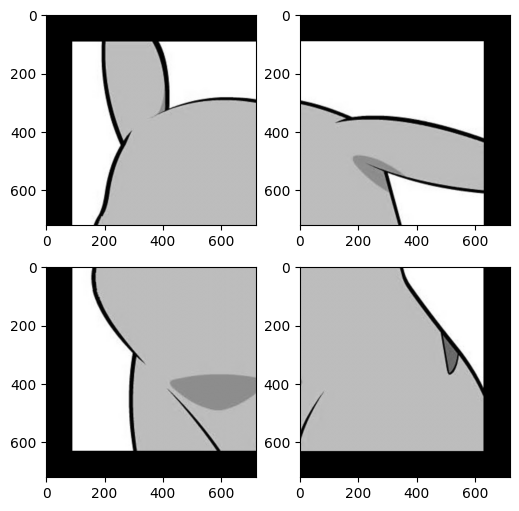

In [64]:
def translate_image(image, tx, ty):
    tinggi, lebar = image.shape
    translated = np.zeros_like(image)

    for y in range(tinggi):
        for x in range(lebar):
            new_x = x + tx
            new_y = y + ty

            if 0 <= new_x < lebar and 0 <= new_y < tinggi:
                translated[new_y, new_x] = image[y, x]

    return translated

aa = 50
ab = 50
jokoa_array = np.array(jokoa_flip)
jokoa_translated = translate_image(jokoa_array, aa, ab)

jokob_array = np.array(jokob_flip)
ba = -50
bb = 50
jokob_translated = translate_image(jokob_array, ba, bb)

jokoc_array = np.array(jokoc_flip)
ca = 50
cb = -50
jokoc_translated = translate_image(jokoc_array, ca, cb)

jokod_array = np.array(jokod_flip)
da = -50
db = -50
jokod_translated = translate_image(jokod_array, da, db)

fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes[0, 0].imshow(jokoa_translated, cmap='gray')

axes[0, 1].imshow(jokob_translated, cmap='gray')

axes[1, 0].imshow(jokoc_translated, cmap='gray')

axes[1, 1].imshow(jokod_translated, cmap='gray')

plt.show()

Proses 3 dilakukan untuk mentranslasi gambar, yaitu memindahkan keempat gambar ke posisi pojoknya masing-masing. Dengan translasi ini, setiap gambar ditempatkan sesuai posisinya dalam grid, sehingga mempermudah proses penggabungan pada tahap selanjutnya. Langkah ini memastikan tata letak gambar menjadi lebih terorganisir dan sesuai dengan tujuan visualisasi atau analisis berikutnya.

### PROSES 4: DILATASI DENGAN SKALA 2

Cell code di bawah berfungsi untuk menerapkan dilatasi dan pemotongan padding hitam pada gambar. Fungsi dilate_image mengubah ukuran gambar dengan memperbesar resolusi berdasarkan faktor skala yang diberikan, dengan cara menyalin piksel dari posisi asal ke posisi baru. Setelah itu, fungsi crop_black_padding digunakan untuk memotong area gambar yang memiliki padding hitam, yaitu bagian yang tidak mengandung informasi penting, berdasarkan ambang batas nilai piksel tertentu. Gambar-gambar yang telah diproses ini kemudian ditampilkan dalam grid 2x2 dengan colormap grayscale menggunakan matplotlib.

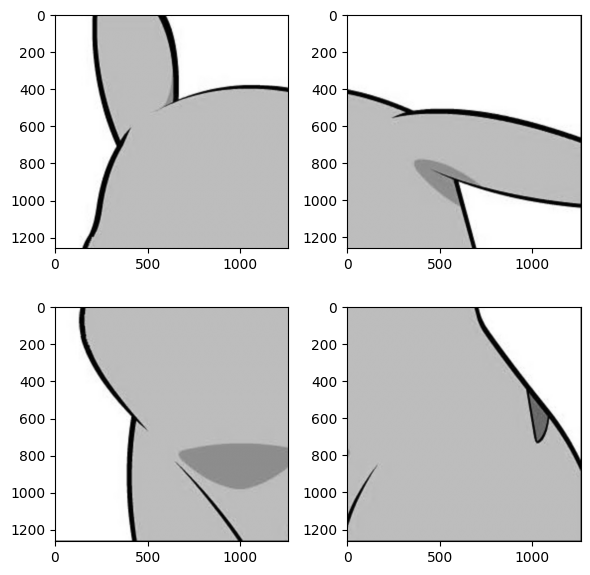

In [65]:
def dilate_image(image, scale):
    tinggi, lebar = image.shape
    new_tinggi, new_lebar = tinggi * scale, lebar * scale
    dilated = np.zeros((new_tinggi, new_lebar), dtype=image.dtype)

    for y in range(new_tinggi):
        for x in range(new_lebar):
            original_y = min(y // scale, tinggi - 1)
            original_x = min(x // scale, lebar - 1)
            dilated[y, x] = image[original_y, original_x]

    return dilated

def crop_black_padding(image, threshold=2.5):
    tinggi = len(image)
    lebar = len(image[0])

    atas, bawah = 0, tinggi - 1
    kiri, kanan = 0, lebar - 1

    for y in range(tinggi):
        if any(pixel > threshold for pixel in image[y]):
            atas = y
            break

    for y in range(tinggi - 1, -1, -1):
        if any(pixel > threshold for pixel in image[y]):
            bawah = y
            break

    for x in range(lebar):
        if any(image[y][x] > threshold for y in range(tinggi)):
            kiri = x
            break

    for x in range(lebar - 1, -1, -1):
        if any(image[y][x] > threshold for y in range(tinggi)):
            kanan = x
            break

    cropped = []
    for y in range(atas, bawah + 1):
        cropped.append(image[y][kiri:kanan + 1])

    return cropped

jokoa_dilated = crop_black_padding(dilate_image(jokoa_translated, 2))
jokob_dilated = crop_black_padding(dilate_image(jokob_translated, 2))
jokoc_dilated = crop_black_padding(dilate_image(jokoc_translated, 2))
jokod_dilated = crop_black_padding(dilate_image(jokod_translated, 2))

fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes[0, 0].imshow(jokoa_dilated, cmap='gray')

axes[0, 1].imshow(jokob_dilated, cmap='gray')

axes[1, 0].imshow(jokoc_dilated, cmap='gray')

axes[1, 1].imshow(jokod_dilated, cmap='gray')

plt.tight_layout()
plt.show()


Proses 4 dilakukan untuk melakukan dilatasi dengan skala 2, dengan tujuan menghilangkan area kosong (zero padding) di sekitar gambar. Dengan memperbesar gambar, bagian yang berisi objek menjadi lebih menonjol, sehingga mempermudah pemotongan area hitam di sekitarnya pada langkah selanjutnya.

### PROSES 5: MENGGABUNGKAN KEEMPAT CITRA

Cell code di bawah berfungsi untuk menggabungkan gambar-gambar yang telah diproses dilatasi secara horizontal dan vertikal. Fungsi `hstack` digunakan untuk menggabungkan dua array secara horizontal (sebelah-sebelahan), dan `vstack` digunakan untuk menggabungkan dua array secara vertikal (di atas dan di bawah). Setelah gambar `jokoa_dilated`, `jokob_dilated`, `jokoc_dilated`, dan `jokod_dilated` digabungkan, hasilnya disimpan dalam variabel `JokoPikantoro`. Gambar yang telah digabungkan kemudian ditampilkan dengan menggunakan `matplotlib` dalam format grayscale.

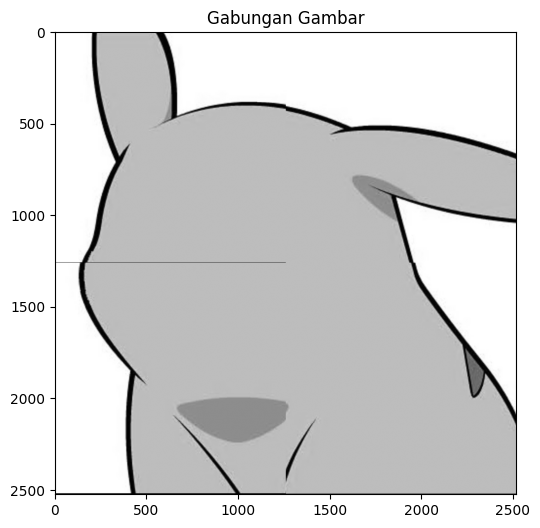

In [66]:
def hstack(arr1, arr2):
    max_rows = max(arr1.shape[0], arr2.shape[0])
    max_cols = arr1.shape[1] + arr2.shape[1]
    combined = np.zeros((max_rows, max_cols), dtype=arr1.dtype)
    combined[:arr1.shape[0], :arr1.shape[1]] = arr1
    combined[:arr2.shape[0], arr1.shape[1]:] = arr2
    return combined

def vstack(arr1, arr2):
    max_cols = max(arr1.shape[1], arr2.shape[1])
    max_rows = arr1.shape[0] + arr2.shape[0]
    combined = np.zeros((max_rows, max_cols), dtype=arr1.dtype)
    combined[:arr1.shape[0], :arr1.shape[1]] = arr1
    combined[arr1.shape[0]:, :arr2.shape[1]] = arr2
    return combined

jokoa_dilated_array = np.array(jokoa_dilated)
jokob_dilated_array = np.array(jokob_dilated)
jokoc_dilated_array = np.array(jokoc_dilated)
jokod_dilated_array = np.array(jokod_dilated)

top_row = hstack(jokoa_dilated_array, jokob_dilated_array)
bottom_row = hstack(jokoc_dilated_array, jokod_dilated_array)
JokoPikantoro = vstack(top_row, bottom_row)

fig, axes = plt.subplots(1, 1, figsize=(6, 6))
axes.imshow(JokoPikantoro, cmap='gray')
axes.set_title('Gabungan Gambar')
plt.axis('on')
plt.show()


Proses 5 bertujuan untuk menggabungkan keempat citra hasil transformasi menjadi satu citra utuh dalam satu frame. Hal ini dilakukan agar semua citra tersusun rapi dalam satu tampilan akhir yang terorganisir.

### PROSES 6: PENGGABUNGAN KEDUA CITRA

Cell code ini digunakan untuk membaca gambar `IronMan.png`, mengubahnya ke grayscale, dan menampilkannya dengan colormap grayscale menggunakan `matplotlib`. Gambar ditampilkan lengkap dengan sumbu untuk mempermudah pengamatan.

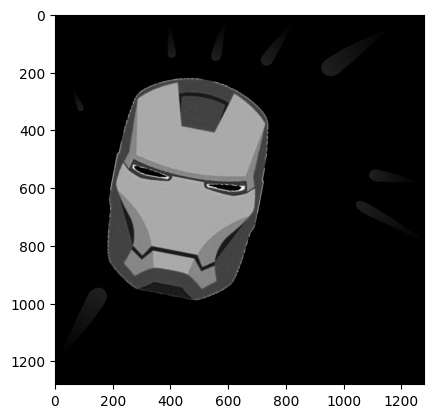

In [67]:
mask = plt.imread('Asset/IronMan.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
plt.imshow(mask, cmap='gray')
plt.axis('on')
plt.show()

Cell code di bawah ini berfungsi untuk meresize dua gambar (`JokoPikantoro` dan `mask`) menjadi 1000x1000 piksel. Setelah itu, filter diterapkan pada gambar `mask` untuk mengubah pixel hitam menjadi transparan dan pixel abu-abu menjadi putih. Gambar `JokoPikantoro1` dan `mask1` kemudian ditampilkan secara berlapis menggunakan `matplotlib`, dengan gambar `mask1` ditampilkan di atas `JokoPikantoro1` dengan transparansi.

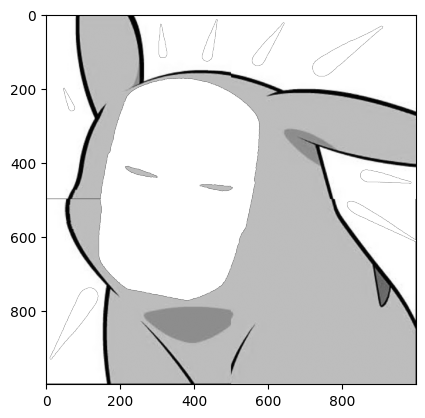

In [ ]:
def resize_image(img, new_width, new_height):
    old_height = len(img)
    old_width = len(img[0])
    
    new_img = []

    for y in range(new_height):
        row = []
        for x in range(new_width):
            src_x = int(x * old_width / new_width)
            src_y = int(y * old_height / new_height)
            row.append(img[src_y][src_x])
        new_img.append(row)

    return new_img



JokoPikantoro1 = resize_image(JokoPikantoro, 1000, 1000)
masknew = resize_image(mask, 1000, 1000)

def is_grayscale(pixel):
    return pixel != 0 and pixel != 255

def is_black(pixel):
    return pixel == 0

def apply_filter(img):
    height = len(img)
    width = len(img[0])
    
    result = []
    for y in range(height):
        row = []
        for x in range(width):
            pixel = img[y][x]

            if is_black(pixel):
                
                row.append((0, 0, 0, 0))
            elif is_grayscale(pixel):
                
                row.append((255, 255, 255, 255))
            else:
                
                row.append((pixel, pixel, pixel, 255))
        result.append(row)
    return result


masknew_array = np.array(masknew)
mask1 = apply_filter(masknew_array)

plt.imshow(JokoPikantoro1, cmap='gray')
plt.imshow(mask1, cmap='gray', alpha=1)  
plt.axis('on')
plt.show()


Cell code di bawah ini berfungsi untuk menggabungkan dua gambar, `JokoPikantoro1` dan `mask1`. Gambar `mask1` yang telah diterapkan filter transparansi digunakan sebagai masker. Jika pixel pada `mask1` memiliki nilai transparansi (alpha = 0), maka pixel pada `combined_image` akan diisi dengan pixel abu-abu dari `JokoPikantoro1`. Jika tidak, maka pixel dari `mask1` yang sudah ada akan dipertahankan. Setelah itu, gambar yang sudah digabungkan (`combined_image`) ditampilkan dengan menggunakan `matplotlib`.

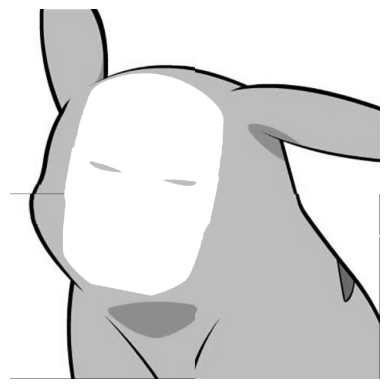

In [79]:
joko_array = np.array(JokoPikantoro1)

combined_image = []

for y in range(len(joko_array)):
    row = []
    for x in range(len(joko_array[0])):
        mask_pixel = mask1[y][x]
        joko_pixel = joko_array[y][x]
        
        if mask_pixel[3] == 0:
            row.append((joko_pixel, joko_pixel, joko_pixel, 255)) 
        else:
            row.append(mask_pixel)
    combined_image.append(row)

combined_image = np.array(combined_image, dtype=np.uint8)

plt.imshow(combined_image)
plt.axis('off')
plt.show()

Proses 6 bertujuan untuk menggabungkan dua citra, yaitu JokoPikantoro sebagai background dan mask sebagai overlay, sehingga menghasilkan satu citra akhir yang memadukan keduanya secara visual.

### PROSES 7: HISTOGRAM DAN NORMALISASI 

In [74]:
min_value = np.min(combined_image)
max_value = np.max(combined_image)

normalise_img = (combined_image - min_value) / (max_value - min_value)

print(normalise_img)

[[[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  ...
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  ...
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  ...
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 ...

 [[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.     

Cell code di atas berfungsi untuk menormalkan nilai piksel pada gambar `combined_image` ke rentang 0 hingga 1, sehingga tiap piksel direpresentasikan dalam bentuk desimal.

In [ ]:
combined_image.sum()

tinggi, lebar = combined_image.shape[:2] 
print("Tinggi:", tinggi)
print("Lebar:", lebar)

newblank = np.zeros(256, dtype=int)

for i in range(tinggi):
    for j in range(lebar):
        value = combined_image[i, j]
        newblank[value] += 1

print(newblank)
print("Total:", newblank.sum())

Tinggi: 1000
Lebar: 1000
[   1769    3944    3611    2860    2147    1753    1411    1074     898
     680     555     469     425     316     300     289     301     246
     246     278     237     197     194     184     187     164     157
     173     165     154     130     133     129     141     125     166
     137     144     129     104     126     140     126     116     123
     108     118     122     153     150     152     111      99     107
      87     100     123     127     117      99     107     111     100
     102     135     113      78     110     113      99     101     105
      95     119     103     113      90      95      87      95     100
      88      78      91      96     112      98      85     106     127
     105      93      80     106      90      80     102     104     107
     119     127     159     169     198     238     218     221     245
     232     204     182     148     143     133     131     115     114
      96     101      91  

Cell code di atas akan menghitung distribusi nilai pixel pada gambar `combined_image`. Array `newblank` digunakan untuk mencatat frekuensi setiap nilai pixel. Setiap pixel pada gambar diperiksa dan jumlah kemunculannya disimpan. Hasilnya, distribusi nilai pixel dan total jumlah pixel ditampilkan.

Cell code dibawah ini membuat histogram yang menampilkan distribusi probabilitas nilai pixel gambar `combined_image` dengan menggunakan grafik batang merah, berjudul "JokoPikantoro IronMan".

Text(0.5, 1.0, 'JokoPikantoro IronMan')

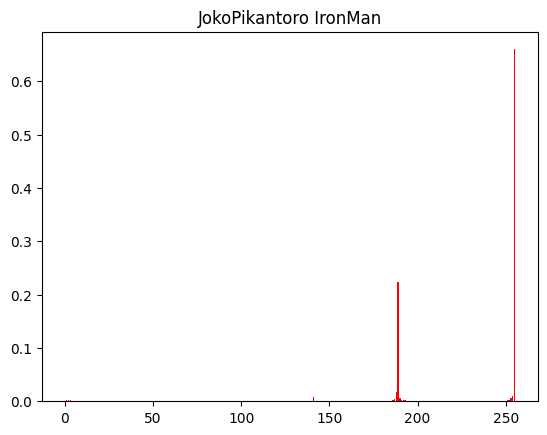

In [ ]:
new = [i for i in range (256)]
plt.bar(new, newblank/newblank.sum(), color='red')
plt.title("JokoPikantoro IronMan")



#### Perbandingan Histogram sebelum dan sesudah normalisasi

Cell code dibawah ini membuat dua grafik histogram dalam satu tampilan menggunakan `subplot`. Grafik pertama (di sebelah kiri) menampilkan histogram frekuensi intensitas pixel gambar sebelum normalisasi, dengan batang biru. Grafik kedua (di sebelah kanan) menunjukkan histogram dengan normalisasi frekuensi, menggunakan batang merah. Kedua grafik memiliki label sumbu X untuk intensitas pixel dan sumbu Y untuk frekuensi. Layout grafik diatur agar lebih rapat dengan `tight_layout()`.

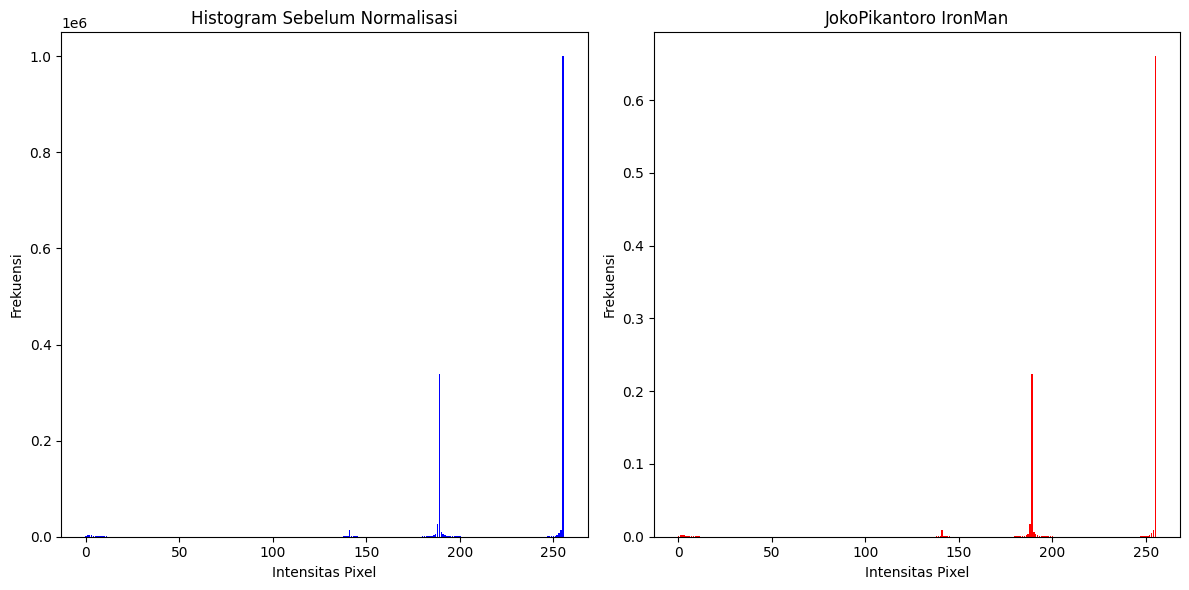

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(new, newblank, color='blue')
plt.title("Histogram Sebelum Normalisasi")
plt.xlabel("Intensitas Pixel")
plt.ylabel("Frekuensi")

plt.subplot(1, 2, 2)
plt.bar(new, newblank/newblank.sum(), color='red')
plt.title("JokoPikantoro IronMan")
plt.xlabel("Intensitas Pixel")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

Histogram sebelum normalisasi menunjukkan distribusi intensitas piksel asli dari gambar, dengan rentang nilai intensitas yang mungkin tidak merata, sehingga gambar dapat terlihat terlalu gelap, terlalu terang, atau memiliki kontras rendah. Setelah normalisasi, distribusi intensitas piksel disesuaikan untuk mencakup rentang penuh nilai intensitas, biasanya dari 0 hingga 1 atau 0 hingga 255, yang meningkatkan kontras gambar dan membuat detail lebih terlihat. Perbandingan antara keduanya menunjukkan bahwa sebelum normalisasi, histogram cenderung memiliki puncak tajam di intensitas tertentu, sedangkan setelah normalisasi, distribusi intensitas menjadi lebih merata. Proses normalisasi ini sangat berguna dalam pengolahan citra untuk meningkatkan kualitas visual gambar dan mempersiapkannya untuk analisis lebih lanjut.

Proses 7 dilakukan untuk membandingkan histogram sebelum dan sesudah normalisasi. Hal ini penting untuk melihat distribusi intensitas piksel dan mengetahui sejauh mana normalisasi memengaruhi pencahayaan atau kontras citra.